In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [417]:
df=pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [418]:
X = df["Med_1_mL"].values.reshape(-1,1)
y = df["Med_2_mL"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [419]:
# Define maximum polynomial degree
max_degree = 20

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")

Best polynomial degree: 9


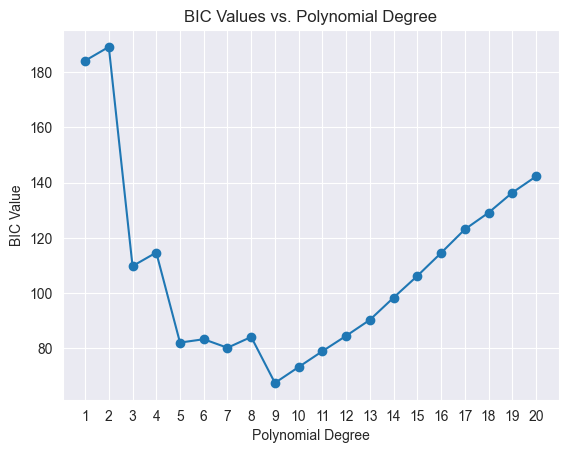

In [420]:
plt.plot(range(1, max_degree+1), bic_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC Values vs. Polynomial Degree')
plt.xticks(range(1, max_degree+1))
plt.grid(True)
plt.show()

In [421]:
X_powers = np.empty((X.shape[0], 0))

for i in range(1, 18):
  X_power = X ** i
  X_powers = np.hstack((X_powers, X_power))

print(X_powers.shape)

(400, 17)


In [422]:
def normalize_zscore(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    normalized_data = (data - mean) / std_dev
    return normalized_data

X_powers = normalize_zscore(X_powers)

In [423]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)

    return theta[:, 0].reshape(-1, 1), cost_history

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X_powers, y,
                                                        test_size=0.2,
                                                        random_state=0)

print(X_train.shape)
print(y_train.shape)

(320, 17)
(320, 1)


In [425]:
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

print(X_train.shape)
print(y_train.shape)

(320, 18)
(320, 1)


In [426]:
theta = np.random.randn(X_train.shape[1], 1)

n_iterations = 10000
learning_rate = 0.1

theta.shape

(18, 1)

In [427]:
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)


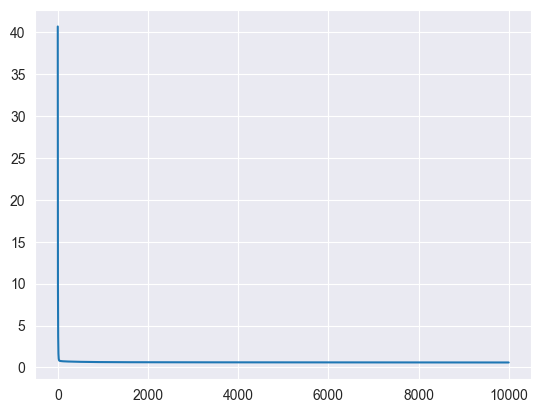

In [428]:
plt.plot(cost_history)

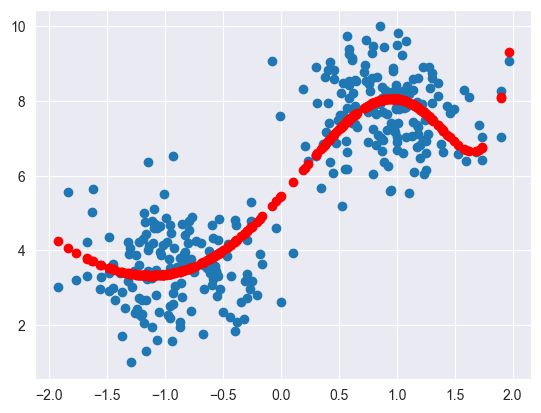

(320, 1)

In [429]:
prediction = model(X_train, theta_final)
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_train[:,0],prediction,color="red")
plt.show()
y_train.shape

In [430]:
from sklearn.metrics import mean_squared_error, r2_score
prediction = model(X_test, theta_final)
r2 = r2_score(y_test, prediction)
r2

0.762783722139821

In [431]:
def model2(X, theta):
    return X.dot(theta)

def cost_function2(X, y, theta, a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)

def grad2(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.dot(model2(X, theta) - y) + a/m * theta *np.sign(theta)

def gradient_descent2(X, y, theta, learning_rate, n_iterations, a):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad2(X, y, theta, a)
        cost_history[i] = cost_function2(X, y, theta, a)

    return theta[:, 0].reshape(-1, 1), cost_history

In [432]:
theta = np.random.randn(X_train.shape[1], 1)

n_iterations = 10000
learning_rate = 0.1

theta.shape

(18, 1)

In [433]:
theta_final, cost_history = gradient_descent2(X_train, y_train, theta, learning_rate, n_iterations, 1)

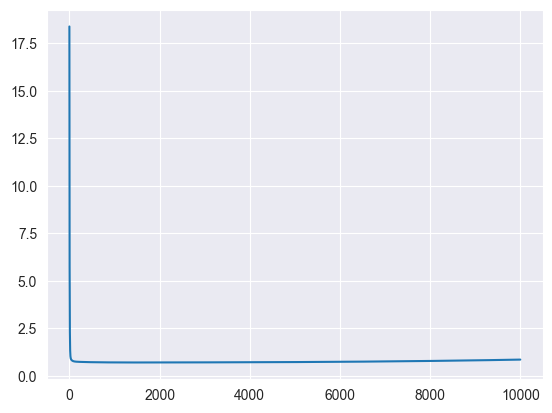

In [434]:
plt.plot(cost_history)

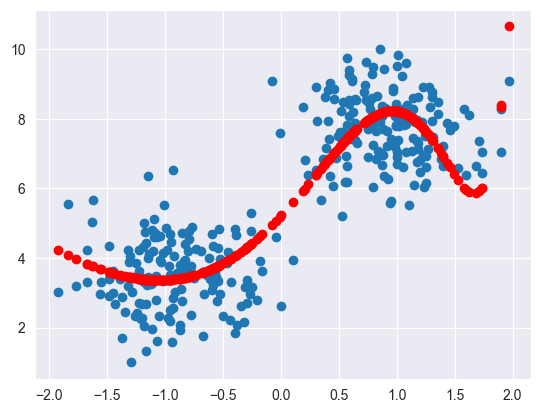

(320, 1)

In [435]:
prediction = model(X_train, theta_final)
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_train[:,0],prediction,color="red")
plt.show()
X_train.shape
y_train.shape

In [436]:
from sklearn.metrics import mean_squared_error, r2_score
prediction = model(X_test, theta_final)
r2 = r2_score(y_test, prediction)
r2

0.7548070476900535

In [437]:
def model3(X, theta):
    return X.dot(theta)

def cost_function3(X, y, theta, a):
    m = len(y)
    return 1/(2*m) * np.sum((model3(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)

def grad3(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.ot(model3(X, theta) - y) + a/m * theta

def gradient_descent3(X, y, theta, learning_rate, n_iterations, a):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta, a)
        cost_history[i] = cost_function3(X, y, theta, a)

    return theta[:, 0].reshape(-1, 1), cost_history

In [438]:
theta = np.random.randn(X_train.shape[1], 1)

n_iterations = 10000
learning_rate = 0.1

theta.shape

(18, 1)

In [439]:
theta_final, cost_history = gradient_descent2(X_train, y_train, theta, learning_rate, n_iterations, 1)

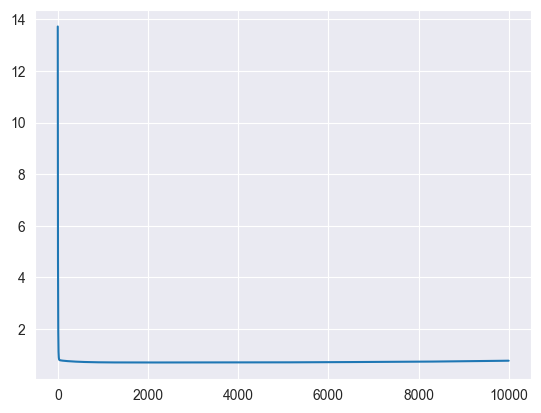

In [440]:
plt.plot(cost_history)

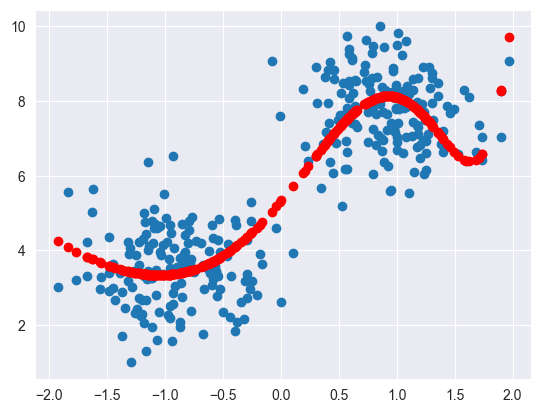

(320, 1)

In [441]:
prediction = model(X_train, theta_final)
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_train[:,0],prediction,color="red")
plt.show()
X_train.shape
y_train.shape

In [442]:
prediction = model(X_test, theta_final)
r2 = r2_score(y_test, prediction)
r2

0.7635868922800433

In [443]:
data = pd.read_csv("Salary_dataset.csv")
X = data["YearsExperience"].values.reshape(-1,1)
y = data["Salary"].values.reshape(-1,1)

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [ ]:
# Define maximum polynomial degree
max_degree = 50

# Initialize lists to store BIC values and models
bic_values = []
models = []

# Loop over polynomial degrees
for degree in range(1, max_degree+1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Compute number of parameters
    num_params = X_train_poly.shape[1]
    
    # Compute log-likelihood
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    
    # Compute BIC
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    
    # Append BIC value and model
    bic_values.append(bic)
    models.append(model)

# Find index of model with lowest BIC
best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")

In [ ]:
plt.plot(range(1, max_degree+1), bic_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC Values vs. Polynomial Degree')
plt.xticks(range(1, max_degree+1))
plt.grid(True)
plt.show()

In [447]:

X_powers = np.empty((X.shape[0], 0))

for i in range(1, 30):
  X_power = X ** i
  X_powers = np.hstack((X_powers, X_power))

print(X_powers.shape)

(30, 29)


In [448]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)

    return theta[:, 0].reshape(-1, 1), cost_history

In [449]:
def normalize_zscore(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    normalized_data = (data - mean) / std_dev
    return normalized_data

X_powers = normalize_zscore(X_powers)

(24, 29)
(24, 1)
(24, 30)
(24, 1)


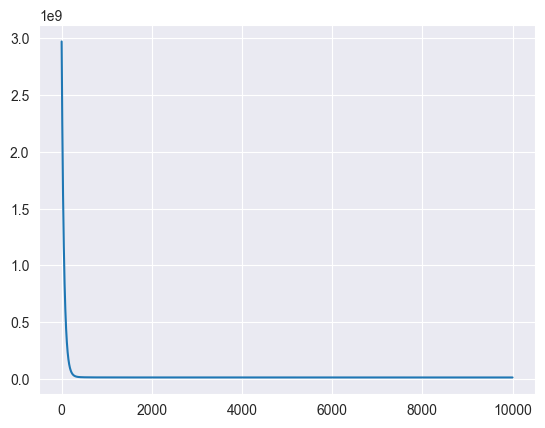

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X_powers, y,
                                                    test_size=0.2,
                                                    random_state=0)

print(X_train.shape)
print(y_train.shape)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

print(X_train.shape)
print(y_train.shape)
theta = np.random.randn(X_train.shape[1], 1)

n_iterations = 10000
learning_rate = 0.01

theta.shape
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

plt.plot(cost_history)

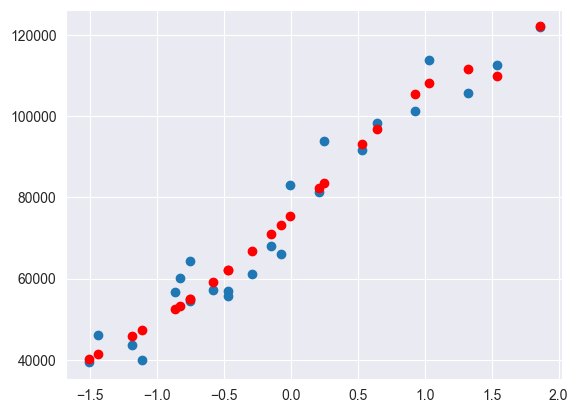

(24, 1)

In [451]:
prediction = model(X_train, theta_final)
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_train[:,0],prediction,color="red")
plt.show()
X_train.shape
y_train.shape

In [452]:
from sklearn.metrics import mean_squared_error, r2_score
prediction = model(X_train, theta_final)
r2 = r2_score(y_train, prediction)
r2

0.9547745571035974

In [453]:
def model3(X, theta):
    return X.dot(theta)

def cost_function3(X, y, theta, a):
    m = len(y)
    return 1/(2*m) * np.sum((model3(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)

def grad3(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.ot(model3(X, theta) - y) + a/m * theta

def gradient_descent3(X, y, theta, learning_rate, n_iterations, a):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta, a)
        cost_history[i] = cost_function3(X, y, theta, a)

    return theta[:, 0].reshape(-1, 1), cost_history

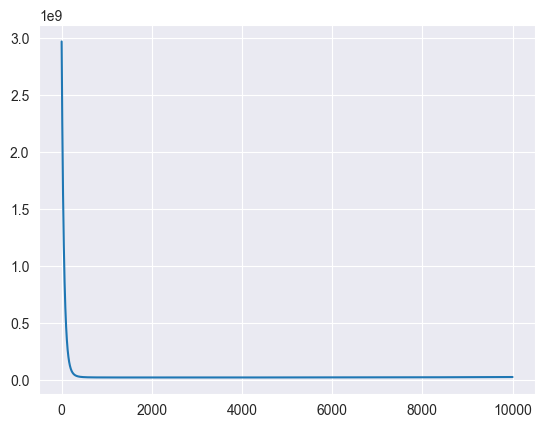

In [454]:
heta = np.random.randn(X_train.shape[1], 1)

n_iterations = 10000
learning_rate = 0.01

theta.shape
theta_final, cost_history2 = gradient_descent2(X_train, y_train, theta, learning_rate, n_iterations, 1)
plt.plot(cost_history2)

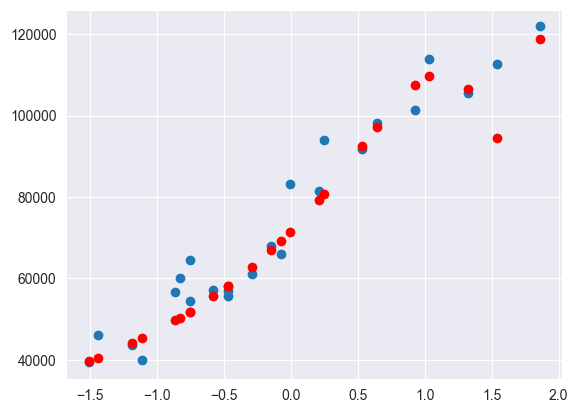

(24, 1)

In [455]:
prediction = model(X_train, theta_final)
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_train[:,0],prediction,color="red")
plt.show()
X_train.shape
y_train.shape

In [456]:
from sklearn.metrics import mean_squared_error, r2_score
prediction = model(X_train, theta_final)
r2 = r2_score(y_train, prediction)
r2

0.9250065740094275